In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import os

# Подготовка данных

На нулевом этапе обработки данных были использованы инструменты Excel с надстройкой Power Query:
1. Фильтрация данных по Приволжью;
2. Фильтрация данных в выбор только бюджетных организаций, удаление пустых кадров;
3. Отбор следующих показателей:


1.1. Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ	

2.8. Удельный вес доходов от НИОКР в общих доходах образовательной организации	

3.1. Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент)	

4.2. Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации	

4.3. Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона	

6.4. Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов	

44 Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии

Выбор обусловлен взаимосвязью с темой кейса, также охватыванием важных для исследования сфер деятельности университетов, по которым можно оценить достижимость плана в рамках Приоритета - 2030.

источник: https://monitoring.miccedu.ru/?m=vpo

In [108]:
#  Импорт данных 
df = pd.read_excel(r"/Users/allastepannikova/Documents/управленческие/data_for_clusters.xlsx")

На этапе импортирования данных просмотр корректной загрузки и описательных статистик:

In [109]:
df.head()

,Наименование образовательной организации,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии"
0,Башкирский государственный педагогический унив...,63.04,5.00,0.22,40.27,173.61,3.67,0.00
1,Башкирский государственный университет,67.19,9.39,1.41,40.67,174.88,5.07,46.50
2,Вятский государственный университет,66.72,5.27,0.73,35.40,199.84,3.64,47.85
3,Глазовский государственный педагогический инс...,69.82,3.00,0.00,30.83,153.33,4.44,0.00
4,Ижевский государственный технический универси...,63.35,8.12,2.39,34.86,190.03,3.37,27.21
...,...,...,...,...,...,...,...,...
101,Государственное бюджетное образовательное учре...,65.11,5.82,0.00,26.88,147.83,14.18,0.00
102,Бюджетное образовательное учреждение высшего о...,81.28,5.12,0.13,10.80,103.47,3.24,0.00
103,Образовательная Автономная некоммерческая орга...,0.00,7.08,0.00,100.00,151.45,9.37,0.00
104,муниципальное бюджетное образовательное учрежд...,0.00,2.34,0.00,8.92,169.99,23.50,0.00


In [111]:
df = df[~df['Наименование образовательной организации'].str.contains('Частное', na=False)]
df = df[~df['Наименование образовательной организации'].str.contains('Частный', na=False)]
df = df[~df['Наименование образовательной организации'].str.contains('Частная', na=False)]
df = df[~df['Наименование образовательной организации'].str.contains('ЧУ', na=False)]
df=df.dropna()
df

,Наименование образовательной организации,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии"
0,Башкирский государственный педагогический унив...,63.04,5.00,0.22,40.27,173.61,3.67,0.00
1,Башкирский государственный университет,67.19,9.39,1.41,40.67,174.88,5.07,46.50
2,Вятский государственный университет,66.72,5.27,0.73,35.40,199.84,3.64,47.85
3,Глазовский государственный педагогический инс...,69.82,3.00,0.00,30.83,153.33,4.44,0.00
4,Ижевский государственный технический универси...,63.35,8.12,2.39,34.86,190.03,3.37,27.21
...,...,...,...,...,...,...,...,...
100,государственное бюджетное образовательное учре...,73.50,8.49,0.00,5.63,147.86,7.53,0.00
101,Государственное бюджетное образовательное учре...,65.11,5.82,0.00,26.88,147.83,14.18,0.00
102,Бюджетное образовательное учреждение высшего о...,81.28,5.12,0.13,10.80,103.47,3.24,0.00
103,Образовательная Автономная некоммерческая орга...,0.00,7.08,0.00,100.00,151.45,9.37,0.00


In [112]:
data_start = df
df = df.drop(['Наименование образовательной организации'], axis=1)
corr = df.corr()
corr.style.background_gradient()

,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии"
"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",1.000000,0.099561,0.320789,-0.304963,-0.020803,-0.097442,-0.030503
2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),0.099561,1.000000,0.146768,-0.022363,0.541719,-0.071559,0.012512
"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",0.320789,0.146768,1.000000,0.045623,0.092482,0.261165,-0.019991
4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),-0.304963,-0.022363,0.045623,1.000000,0.168511,-0.142072,0.348318
4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%),-0.020803,0.541719,0.092482,0.168511,1.000000,-0.003848,0.028090
"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)",-0.097442,-0.071559,0.261165,-0.142072,-0.003848,1.000000,-0.152574
"44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии",-0.030503,0.012512,-0.019991,0.348318,0.028090,-0.152574,1.000000


На матрице корреляции видно, что факторы между собой имеют коэффиценты не выше 0.51. Для этих двух признаков это обусловлено интуитивной связью: чем выше доходы от НИОКР - тем больше зароботные платы в организации. Уберем фактор

4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%) 

поскольку удельный вес доходов от НИОКР в общих доходах образовательной организации (%) по наивной оценке важнее для кластеризации.

In [113]:
df = df.drop(['4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%)'], axis=1)
corr = df.corr()
corr.style.background_gradient()

,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии"
"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",1.000000,0.099561,0.320789,-0.304963,-0.097442,-0.030503
2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),0.099561,1.000000,0.146768,-0.022363,-0.071559,0.012512
"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",0.320789,0.146768,1.000000,0.045623,0.261165,-0.019991
4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),-0.304963,-0.022363,0.045623,1.000000,-0.142072,0.348318
"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)",-0.097442,-0.071559,0.261165,-0.142072,1.000000,-0.152574
"44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии",-0.030503,0.012512,-0.019991,0.348318,-0.152574,1.000000


Теперь высокой корреляции между параметрами нет.

Поскольку далее будет использован алгоритм кластеризации K-means, необходима стандартизация, чтобы факторы перевешивающие по значениям не имели большего влияния на образование кластеров. 

# Кластеризация методом K-means

In [114]:
from sklearn.cluster import KMeans

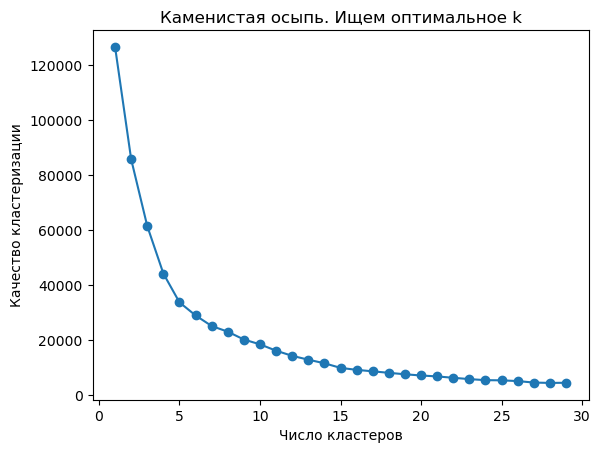

In [115]:
# Строим 10 моделей с числом кластеров от 1 до 30. 
df1=df
K = range(1, 30)
models = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(df1) for k in K]

#  Качество кластеризации вычисляется в model.inertia_
dist = [model.inertia_ for model in models]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')
# Добавляем на график текст
plt.xlabel('Число кластеров')
plt.ylabel('Качество кластеризации')
plt.title('Каменистая осыпь. Ищем оптимальное k')
plt.show()

Вследствие небольшого объема данных "локоть" диаграмме каменистой осыпи сложно выделить. Рационально будет взять 5 кластеров, соотнеся их с оценками от 1 до 5. 

In [116]:
#  максимальное число итераций 
max_iter_1 = 50

In [117]:
model = KMeans(n_clusters=5, random_state=2, max_iter=max_iter_1, n_init=10, 
               verbose=0, tol=0.0001 )

In [118]:
# Кластеризация данных из таблицы df1
model.fit(df1)

KMeans(max_iter=50, n_clusters=5, n_init=10, random_state=2)

In [119]:
#  Сколько итераций потребовалось процедуре?
model.n_iter_

6

In [120]:
data_start['cluster_kmeans'] =model.labels_
df1['cluster_kmeans'] = model.labels_

In [121]:
df1['cluster_kmeans'].sort_values()

0     0
62    0
61    0
60    0
59    0
     ..
15    4
16    4
35    4
5     4
45    4
Name: cluster_kmeans, Length: 94, dtype: int32

In [122]:
df1.groupby(by='cluster_kmeans').mean()

,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии"
cluster_kmeans,,,,,,
0,62.742245,7.990816,1.124490,28.046939,5.604490,2.318571
1,68.098500,9.465500,1.205000,41.686500,4.845500,41.525500
2,0.000000,7.116667,0.000000,99.883333,6.650000,0.000000
3,36.720000,5.680000,0.106667,88.773333,2.633333,100.000000
4,74.066842,8.203684,2.625263,57.054737,5.588421,6.692105


In [134]:
df_0=data_start[data_start['cluster_kmeans']==0]['Наименование образовательной организации']
df_1=data_start[data_start['cluster_kmeans']==1]['Наименование образовательной организации']
df_2=data_start[data_start['cluster_kmeans']==2]['Наименование образовательной организации']
df_3=data_start[data_start['cluster_kmeans']==3]['Наименование образовательной организации']
df_4=data_start[data_start['cluster_kmeans']==4]['Наименование образовательной организации']

print(df_4)

5      Казанский государственный архитектурно-строит...
15     Нижегородский государственный лингвистический...
16     Нижегородский государственный педагогический ...
22               Пензенский государственный университет
25     Пермский национальный исследовательский полит...
28       Поволжский государственный университет сервиса
31    Самарский государственный экономический универ...
35            Тольяттинский государственный университет
41    Уфимский государственный нефтяной технический ...
43     Чувашский государственный университет имени И...
44    Федеральное государственное автономное образов...
45     Казанский государственный медицинский универс...
48     Самарский государственный медицинский универс...
51    Нижегородская государственная медицинская акад...
53    Оренбургский государственный медицинский униве...
73     Башкирский государственный медицинский универ...
75     Ульяновский институт гражданской авиации имен...
86    Образовательная автономная некоммерческая 

При первой попытке построения кластеров были использованы все признаки, но интерпретация была не такой четкой как после того, как был убран коррелирующий с 2.8 фактор.

Интерпретация:
Первый кластер (0) - минимальный показатель по Доле доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения. В остальных параметрах университеты имеют не сильно экстремальные значения. Средний кластер и больший по численности.


Второй кластер (1) - явно доминирующий по показателю удельного веса доходов от НИОКР. При этом, заметно, что статус исследовательского университета у меньшего числа составляющих этого кластера, что интуитивно неочевидно.

Третий кластер (2) - маленький кластер, предположительно без бюджетных мест и общежитий, не привлекающих иностранных студентов. Вероятно - небольшие и непопулярные высшие учебные заведения. Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения 

Четвертый кластер (3) - маленький кластер, где все студенты размещены в общежитии, при этом с минимальными доходами от НИОКР. Также самый низкий балл ЕГЭ при поступлении на бюджет.

Пятый кластер (4) - группа университетов с самым высоким средним баллом ЕГЭ при поступлении на бюджет. При этом это самый привлекательный для инностранцев кластер. Остальные факторы не ниже остальных кластеров. По данным показателям данная группа университетов наиболее оптимальна (Лучший кластер).

Следующий шаг - загрузка ВУЗов из приоритета-2030 и проверка на нахождение их в начальном датасете:

In [140]:
prioritet = pd.read_excel('/Users/allastepannikova/Documents/управленческие/ВУЗ приоритет-2030.xlsx')
unis = prioritet['вуз'].to_list()
resultat = pd.DataFrame(columns = data_start.columns)
for v in unis:
    curr = data_start.loc[data_start['Наименование образовательной организации'].str.contains(v)]
    resultat =pd.concat([resultat,curr],ignore_index=True)
resultat

/var/folders/d9/bfhvjqps6xdds9gmhtflh16c0000gn/T/ipykernel_7770/3412609854.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  curr = data_start.loc[data_start['Наименование образовательной организации'].str.contains(v)]


,Наименование образовательной организации,"1.1_Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ (балл)",2.8_Удельный вес доходов от НИОКР в общих доходах образовательной организации (%),"3.1_Удельный вес численности иностранных студентов (кроме стран Содружества Независимых Государств (далее – СНГ)), обучающихся программам бакалавриата, специалитета, магистратуры, в общей численности студентов (приведенный контингент) (%)",4.2_Доля доходов из средств от приносящей доход деятельности в доходах по всем видам финансового обеспечения (деятельности) образовательной организации (%),4.3_Отношение средней заработной платы НПР в образовательной организации (из всех источников) к средней заработной плате по экономике региона (%),"7.4_Число НПР, имеющих ученую степень кандидата и доктора наук, в расчете на 100 студентов (ед.)","44_Доля студентов, не обеспеченных собственным общежитием, в числе студентов, нуждающихся в общежитии",cluster_kmeans
0,Вятский государственный университет,66.72,5.27,0.73,35.40,199.84,3.64,47.85,1
1,Уфимский государственный нефтяной технический ...,71.88,11.05,2.23,53.16,207.20,4.65,0.00,4
2,Саратовский национальный исследовательский гос...,65.69,16.63,1.70,29.76,181.40,4.70,11.89,0
3,Ульяновский государственный университет,63.74,13.90,2.48,48.54,188.24,5.83,32.17,1
4,Самарский государственный медицинский универс...,79.71,8.15,0.41,57.91,180.92,6.67,0.00,4
5,Казанский национальный исследовательский техн...,61.16,25.02,1.54,39.02,171.89,4.91,37.33,1
6,федеральное государственное автономное образов...,73.37,27.38,1.76,25.07,248.96,6.56,4.92,0
7,Нижегородский государственный технический унив...,66.89,28.03,0.58,38.83,174.98,5.45,0.00,0
8,Башкирский государственный медицинский универ...,82.11,2.17,1.86,67.40,177.21,10.35,18.00,4
9,Казанский государственный энергетический унив...,66.92,11.39,1.24,38.76,174.83,3.54,4.85,0


Найдены 15 ВУЗов в начальном датасете, соотношение кластеров:

In [141]:
resultat['cluster_kmeans'].value_counts()

cluster_kmeans
4    7
0    5
1    3
Name: count, dtype: int64

Ни один ВУЗ не попал в класетры 2 и 3, которые по интерпретации являются наихудшими, что логично - ВУЗы из приоритета-2030 не могут иметь низкие показатели по факторам оценки успешности деятельности. А большая часть попала в лучший кластер, что также подтверждает возможность выполнимости плана этих учебных заведений. Остальные - попали в усредненые по показателям группы, имеющие большую численность (вероятность попасть именно в них большая).

# Выводы

В ходе исследования были выбраны факторы оценки деятельности университетов на основе наивной оценки и корреляционного анализа. Очищены и подготовлены данные, для проведения кластерного анализа. Полученные кластеры дали возможность оценить выполнимость планов участников Приоритет-2030 посредством включения или невключения в лучший из полученных кластеров. Таким образом, по полученным результатам, можно подтвердить гипотезу, что хотя бы 7 из 23 университетов могут выполнить поставленный план. Проверка на одном из них: Самарский государственный медицинский университет Минздрава РФ - по поставленным планам и их отражению все получилось перевыполнить, значит предсказание корректно.
Источник:https://priority2030.ru/analytics/nno7yddutg/about/indicators